**Prática 05 – Seleção de Atributos**

**Alunos:

GIOVANNI SURIANI FERREIRA

JORGE ALIOMAR TROCOLI ABDON DANTAS**

**Enunciado(s):**

Cada dupla deve escolher um problema no Kaggle. Elaborar uma solução e apresentar para turma no dia da entrega. A solução da dupla deve ser entregue no Moodle em um Python Notebook. Especificamente, a dupla deve:
- Pesquisar um problema interessante no Kaggle que envolva dados tabulares/estruturados;
- Realizar uma análise exploratória dos dados da competição. Isto é, visualizar os dados, tentar identificar dados faltantes, instâncias ruidosas e tendências nos dados;
- Entender e implementar a métrica de avaliação da competição;
- Implementar uma solução simples para o problema da competição para gerar um baseline (isto é, o desempenho mínimo que o sua abordagem deve alcançar);
- Estudar soluções para problemas semelhantes ao da competição escolhida. A dupla pode pesquisar, por exemplo, em artigos acadêmicos, artigos técnicos da Internet e o no próprio Kaggle;
- Implementar diferentes abordagens para a competição e reportar o desempenho de cada abordagem implementada;
- Realizar uma avaliação de parâmetro (hyperparameter tuning) das abordagens escolhidas para o problema. Para realizar a avaliação dos parâmetros você pode utilizar GridSearchCV ou Optuna.
- Além de outras abordagens, a dupla deve:
    - Propor pelo menos uma abordagem que envolva meta-learning. Ou seja, a dupla deve propor uma forma diferente de combinar vários modelos. Por exemplo, utilize a abordagem do Random Forest, porém com vários classificadores ou invés de utilizar apenas Árvores de Decisão.
- Para cada abordagem apresentada, a dupla deve apresentar:
    - desempenho no conjunto de treino, o desempenho deve ser medido com uma validação cruzada com 10 folds (10-fold cross-validation).
    - desempenho no conjunto de teste reportado pelo Kaggle

# DESAFIO E PROBLEMA ESCOLHIDO
Home Credit Default Risk (https://www.kaggle.com/competitions/home-credit-default-risk)

O desafio consiste em melhorar os modelos preditivos, da HOME CREDIT, de crédito voltados a pessoas sem histórico bancário. Utilizando dados alternativos como registros de telecomunicações e transações, a empresa quer garantir que mais pessoas aptas recebam empréstimos justos e sustentáveis. O desafio propõe que os participantes usem técnicas de ciência de dados e machine learning para prever com mais precisão a capacidade de pagamento dos clientes.

O conjunto de dados contém informações detalhadas sobre o histórico financeiro de clientes da Home Credit e de outras instituições, com o objetivo de prever a capacidade de pagamento de novos empréstimos.

 - application_{train|test}.csv: Esta é a tabela principal, dividida em dois arquivos: Treinamento (com a variável TARGET) e Teste (sem TARGET). Contém dados estáticos de todas as solicitações de empréstimo. Cada linha representa um empréstimo.

 - bureau.csv: Todos os créditos anteriores dos clientes fornecidos por outras instituições financeiras, reportados ao Bureau de Crédito (apenas para clientes com empréstimo na amostra). Cada linha representa um crédito anterior registrado antes da data da aplicação atual.

 - bureau_balance.csv: Saldos mensais dos créditos anteriores no Bureau de Crédito. Cada linha representa um mês de histórico para cada crédito anterior — ou seja, número de empréstimos * número de créditos anteriores * número de meses com histórico disponível.

 - POS_CASH_balance.csv: Saldos mensais dos empréstimos anteriores no ponto de venda (POS) ou empréstimos em dinheiro que o cliente teve com a Home Credit. Uma linha por mês de histórico de cada crédito anterior relacionado ao empréstimo na amostra.

 - credit_card_balance.csv: Saldos mensais dos cartões de crédito anteriores que o cliente tem com a Home Credit. Formato similar ao POS_CASH_balance, mas para cartões de crédito.

 - previous_application.csv: Todas as solicitações anteriores de empréstimos feitas à Home Credit por clientes com empréstimos na amostra atual. Uma linha por solicitação anterior.

 - installments_payments.csv: Histórico de pagamentos de créditos anteriores concedidos pela Home Credit. Inclui: a) uma linha para cada pagamento feito, e b) uma linha para cada parcela não paga. Cada linha representa um pagamento ou uma parcela de um crédito anterior.

 - HomeCredit_columns_description.csv: Arquivo com a descrição das colunas de todos os outros arquivos do conjunto de dados.

 As tabelas podem se relacionar conforme imagem abaixo:

 ![image.png](attachment:image.png)




# PREPARAÇÃO DA BASE DE DADOS - Todos os dados

In [4]:
#Importando Bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Otimizador Giovanni
from sklearnex import patch_sklearn
patch_sklearn()

CSV_PATH = "/home/gi/Desktop/Semestre8/Inteligencia_Computacional/TP1_csvs" # Path Giovanni
#validacao_cruzada_num_folds = 10 # Para Giovanni
# CSV_PATH = "E:/Documentos/CEFET/OneDrive/Documentos/2ECOM067_INTELIGENCIA-COMPUTACIONAL-I_T01/TP1/bases/" # Path Jorge
validacao_cruzada_num_folds = 3 # Para Jorge

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [41]:
#Carregando Base de dados principal - Treino
df_train = pd.read_csv(f"{CSV_PATH}/df_train_full.csv")
df_test  = pd.read_csv(f"{CSV_PATH}/df_test_full.csv")

# Normalização Padrão (não realizada)

In [6]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# PREPARAÇÃO DA BASE DE DADOS - Amostra

In [42]:
#Realizar transformação das variáveis categóricas em variáveis númericas (Label Enconder)

#Importação da biblioteca
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Busca dos atributos do tipo object e category - TREINO
colunas_categoricas_train = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

#Substituição dos valores nulos por nada nas colunas categoricas
for c in colunas_categoricas_train:
    df_train[c] = df_train[c].fillna("")
    df_test[c] = df_test[c].fillna("")

#Concatenação dos dataframes treino e teste com o objetivo de realizar um label enconder com códigos únicos
df_all = pd.concat([df_train, df_test], axis=0)
print(df_train[colunas_categoricas_train].shape)
print(df_all.shape)
for coluna in colunas_categoricas_train:
    print(coluna)
    le.fit(df_all[coluna])
    df_train[coluna] = le.transform(df_train[coluna].astype(str))
    df_test[coluna] = le.transform(df_test[coluna].astype(str))


(307511, 33)
(356255, 195)
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
CREDIT_ACTIVE
CREDIT_CURRENCY
CREDIT_TYPE
STATUS
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [ ]:
#Amostra df_train
df_train = df_train.sample(frac=1, random_state=42)  # Para Jorge
#df_train = df_train.sample(frac=0.600, random_state=42)  # Para Giovanni

In [44]:
#Divisão treino
X_train = df_train.drop(columns={"TARGET"})
y_train = df_train.TARGET

In [45]:
#Verificar se y_train tem 0 e 1. Se true, OK dá para continuar a modelagem
#                                Se false, ajustar para que tenha 0 e 1
set(y_train) == {0, 1}

True

# 1. Treinamento Individual dos Classificadores

In [11]:
#Importanto as Bibliotecas dos classificadores
#from sklearn.tree           import DecisionTreeClassifier   # Árvore de Decisão
from sklearn.neighbors      import KNeighborsClassifier     # KNN
from sklearn.svm            import SVC                      # SVM
from sklearn.linear_model   import LogisticRegression       # LogisticRegression
from sklearn.ensemble       import RandomForestClassifier   # Random Forest
from xgboost                import XGBClassifier            # XGBClassifier             
from lightgbm               import LGBMClassifier           # LGBMClassifier 
from catboost               import CatBoostClassifier       # CatBoostClassifier 

## Obtendo as melhores combinações de hiperparâmetros para cada modelo

In [12]:
#Importanto bibliotecas pertinentes
from sklearn.model_selection import GridSearchCV

In [13]:
#Função para encontrar os melhores hiperparâmetros para o modelo
def melhores_parametros_modelo( classificador,  # Classificador
                                modelo_base,    # Modelo base
                                param_grid,     # Dicionário com os parâmetros a testar
                                X_train,        # Dataframe X_train
                                y_train,        # Dataframe y_train
                                X_test):        # X_test para criação dos arquivos no Kaggle

    #Realizando o GridSearch
    grid = GridSearchCV(estimator   = modelo_base,                  # estimator     --> Modelo que será ajustado 
                        param_grid  = param_grid,                   # param_grid    --> Dicionário com os hiperparâmetros e os valores a serem testados
                        scoring     = 'roc_auc',                    # scoring       --> Métrica de avaliação 
                        cv          =  validacao_cruzada_num_folds, # cv            --> Número de folds na validação cruzada
                        n_jobs      = -1,                           # n_jobs        --> Número de threads (ex: -1 usa todos os núcleos disponíveis)
                        verbose     = 0)                            # verbose       --> Nível de mensagens de progresso (0 = nenhum, 1 = mínimo, 2 = detalhado)
    
    #Realizando o Treino
    grid.fit(X_train, y_train)

    #Realizando a predição com base no X_test
    preds = grid.predict(X_test)

    #Geração do Data Frame das predições com o Teste Global
    df_kaggle = X_test.copy()
    df_kaggle["TARGET"] = preds

    # Salvar os CSVs
    df_kaggle[["SK_ID_CURR", "TARGET"]].to_csv(f"df_kaggle_{classificador}.csv", index=False)

    melhor_modelo = {'param_grid': grid.best_params_, 'roc_auc': round(grid.best_score_,4)}
                     
    return melhor_modelo

In [14]:
#Criação de dicionário de classificadores

dicionario_classificadores = {
    'RANDOM_FOREST':        {'modelo_base':  RandomForestClassifier(random_state=42),
                             'param_grid':  {   'max_depth':         [4, 5, 6],         # profundidade das árvores
                                                'n_estimators':      [100, 200, 300],   # número de árvores
                                                'min_samples_split': [2, 5, 10],        # min. amostras p/ split
                                                'min_samples_leaf':  [1, 2, 4]          # min. amostras em folha
                                            }
                            },                            
    'XGBOOST':  {'modelo_base':  XGBClassifier(random_state=42),
                 'param_grid':  {  'max_depth':     [4, 5, 6],         # profundidade das árvores
                                    'learning_rate': [0.1, 0.2, 0.3],   # taxa de aprendizado
                                    'n_estimators':  [100, 150, 200],   # número de árvores
                                    'subsample':     [0.6, 0.8, 1.0]    # fração de amostras por árvore
                                }
                },
    # 'XGBOOST':  {'modelo_base':  XGBClassifier(random_state=42),
    #              'param_grid':  {  'max_depth':     [4, 6],         # profundidade das árvores
    #                                 'learning_rate': [0.1, 0.3],   # taxa de aprendizado
    #                                 'n_estimators':  [100, 200]   # número de árvores
    #                             }
                # },
    'LIGHTGBM': {'modelo_base':  LGBMClassifier(random_state=42, force_col_wise=True, verbose=-1),
                 'param_grid':  {   'max_depth':    [4, 5, 6],          # profundidade das árvores
                                    'learning_rate':[0.1, 0.2, 0.3],    # taxa de aprendizado
                                    'n_estimators': [100, 150, 200],    # número de árvores
                                    'subsample':    [0.6, 0.8, 1.0]     # fração de amostras por árvore
                                }
                },
    'CATBOOST': {'modelo_base':  CatBoostClassifier(random_state=42, verbose=0),
                 'param_grid':  {   'depth':        [4, 5, 6],          # profundidade das árvores
                                    'learning_rate':[0.1, 0.2, 0.3],    # taxa de aprendizado
                                    'iterations':   [100, 150, 200],    # número de árvores
                                    'l2_leaf_reg':  [1, 3]              # parâmetro de regularização L2
                                }
                },
}

In [15]:
#Gerando todos os modelos
melhores_modelos={}
for classificador, especificacoes in dicionario_classificadores.items():
    mm = melhores_parametros_modelo(classificador, especificacoes['modelo_base'],especificacoes['param_grid'],X_train, y_train,df_test)
    melhores_modelos[classificador] = mm

In [16]:
melhores_modelos

{'RANDOM_FOREST': {'param_grid': {'max_depth': 5,
   'min_samples_leaf': 1,
   'min_samples_split': 10,
   'n_estimators': 300},
  'roc_auc': np.float64(0.7016)},
 'XGBOOST': {'param_grid': {'learning_rate': 0.1,
   'max_depth': 4,
   'n_estimators': 100,
   'subsample': 0.8},
  'roc_auc': np.float64(0.6987)},
 'LIGHTGBM': {'param_grid': {'learning_rate': 0.1,
   'max_depth': 4,
   'n_estimators': 100,
   'subsample': 0.6},
  'roc_auc': np.float64(0.6963)},
 'CATBOOST': {'param_grid': {'depth': 4,
   'iterations': 100,
   'l2_leaf_reg': 3,
   'learning_rate': 0.1},
  'roc_auc': np.float64(0.7129)}}

# 2. Combinação dos modelos (VotingClassifier e StackingClassifier)

Pegou-se os modelos com melhores resultados e aplicou-se a estratégia de combinação deles

In [46]:
#Importando Bibliotecas pertinentes
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [47]:
skf = StratifiedKFold(n_splits=validacao_cruzada_num_folds, shuffle=True, random_state=42)

In [48]:
def avaliar_modelo(modelo, X, y, nome="Modelo"):
     roc_auc = []
     for train_idx, test_idx in skf.split(X, y):
         X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
         y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
         modelo.fit(X_train, y_train)
         preds = modelo.predict(X_test)
         roc_auc.append(roc_auc_score(y_test, preds))
     print(f"{nome}: roc_auc = {np.mean(roc_auc):.4f}, desvio padrão = {np.std(roc_auc):.4f}")

In [49]:
# Estimadores (melhores modelos individuais após GridSearch)
estimador_01 = RandomForestClassifier(random_state      = 42, 
                                      max_depth         = 5, 
                                      min_samples_leaf  = 1, 
                                      min_samples_split = 10,
                                      n_estimators      = 300)

estimador_02 = XGBClassifier(random_state   = 42,
                             learning_rate  = 0.1,
                             max_depth      = 4,
                             n_estimators   = 100,
                             subsample      = 0.8)

estimador_03 = LGBMClassifier(random_state  = 42, force_col_wise = True, verbose = -1,
                              learning_rate = 0.1,
                              max_depth     = 4,
                              n_estimators  = 100,
                              subsample     = 0.6)

estimador_04 = CatBoostClassifier(random_state  = 42, verbose=0,
                                  depth         =  4,
                                  iterations    = 100,
                                  l2_leaf_reg   = 3,
                                  learning_rate = 0.1)

In [50]:
#Voting HARD
voting_hard = VotingClassifier(estimators=[('RANDOMFOREST', estimador_01), ('XGBOOST', estimador_02), 
                                           ('LIGHTGBM',     estimador_03), ('CATBOOST', estimador_04)], voting='hard')
avaliar_modelo(voting_hard, X_train, y_train, "VotingClassifier (Hard)")

#Voting SOFT
voting_soft = VotingClassifier(estimators=[('RANDOMFOREST', estimador_01), ('XGBOOST', estimador_02), 
                                           ('LIGHTGBM',     estimador_03), ('CATBOOST', estimador_04)], voting='soft')
avaliar_modelo(voting_soft, X_train, y_train, "VotingClassifier (Soft)")

#
X_test = df_test.copy()

#Predição do Modelo com os dados de Teste Global
preds_voting_hard   = voting_hard.predict(X_test) # Voting Hard
preds_voting_soft   = voting_soft.predict(X_test) # Voting Soft


#Geração do Data Frame das predições com o Teste Global
df_test_voting_hard = X_test.copy()
df_test_voting_soft = X_test.copy()
df_test_voting_hard["TARGET"] = preds_voting_hard
df_test_voting_soft["TARGET"] = preds_voting_soft

#Exibição do Data Frame que será enviado para o Kaggle
df_test_voting_hard[["SK_ID_CURR","TARGET"]]
df_test_voting_soft[["SK_ID_CURR","TARGET"]]

#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test_voting_hard[["SK_ID_CURR","TARGET"]].to_csv("df_kaggle_VOTING-HARD.csv", index=False)
df_test_voting_soft[["SK_ID_CURR","TARGET"]].to_csv("df_kaggle_VOTING-SOFT.csv", index=False)

VotingClassifier (Hard): roc_auc = 0.5009, desvio padrão = 0.0007
VotingClassifier (Soft): roc_auc = 0.5006, desvio padrão = 0.0009


In [51]:
voting_hard

VotingClassifier(estimators=[('RANDOMFOREST',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=No...
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('LIGHTGBM',
                              LGBMClassifier(force_col_wise=True, max_depth=4,
                                             random_state=42, subsample=0.6,
                                             verbose=-1)),
                             ('CATBOOST',
                              <catboost.core.CatBoostClassifier object at 0x72aa3ae36530>)])

In [52]:
voting_soft

VotingClassifier(estimators=[('RANDOMFOREST',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=10,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('XGBOOST',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=No...
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('LIGHTGBM',
                              LGBMClassifier(force_col_wise=True, max_depth=4,
                                             random_state=42, subsample=0.6,
                                             verbose=-1)),
                             ('CATBOOST',
                              <catboost.core.CatBoostClassifier object at 0x72aa3ae36530>)],
                 voting='soft')

In [53]:
#Stacking
stacking = StackingClassifier([('RANDOMFOREST', estimador_01), ('XGBOOST', estimador_02), 
                               ('LIGHTGBM',     estimador_03), ('CATBOOST', estimador_04)], final_estimator = LogisticRegression(), cv = validacao_cruzada_num_folds)

avaliar_modelo(stacking, X_train, y_train, "Stacking")

#
X_test = df_test.copy()

#Predição do Modelo com os dados de Teste Global
preds_stacking   = stacking.predict(X_test) # Voting Hard


#Geração do Data Frame das predições com o Teste Global
df_test_stacking = X_test.copy()
df_test_stacking["TARGET"] = preds_stacking

#Exibição do Data Frame que será enviado para o Kaggle
df_test_stacking[["SK_ID_CURR","TARGET"]]

#Salvar o Data Frame que será enviado ao Kaggle em um arquivo .CSV
df_test_stacking[["SK_ID_CURR","TARGET"]].to_csv("df_kaggle_STACKING.csv", index=False)


Stacking: roc_auc = 0.5174, desvio padrão = 0.0047


In [54]:
stacking

StackingClassifier(cv=3,
                   estimators=[('RANDOMFOREST',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_split=10,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('XGBOOST',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_me...
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('LIGHTGBM',
                                LGBMClassifier(force_col_wise=True, max_depth=4,
                                               random_state=42, subsample=0.6,
                                               verbose=-1)),
                               ('CATBOOST',
                                <catboost.core.CatBoostClassifier object at 0x72aa3ae36530>)],
                   final_estimator=LogisticRegression())

# 3. Abordagem Meta-Learning

Para esta abordagem utilizaremos o peso de cada ROC_AUC como referência. 

Ex.:    

Random Forest   -> ROC_AUC = 0,6040     --> Peso = 0,6040/ 2,626 = 0,230

XGbost          -> ROC_AUC = 0,6966     --> Peso = 0,6966/ 2,626 = 0,265

Lightboost      -> ROC_AUC = 0,6649     --> Peso = 0,6649/ 2,626 = 0,253

Catboost        -> ROC_AUC = 0,6605     --> Peso = 0,6605/ 2,626 = 0,252

-------------------------------------------------------------------------

Soma            ->            2,626


Target_RForest  Target_XGBOOST  Target_LGBOOST  Target_CATBOOST Target_Combinado

1               1               0               0               1*0,230 + 1*0,265 + 0*0,253 + 0*0,252 = 0,495 (Predição = 0)
        
Critério de seleção:

Se Target_combinado >=0,5 então predição = 1

Se Target_combinado <0,5  então predição = 0
        

In [55]:
estimators={'RANDOMFOREST': estimador_01, 'XGBOOST': estimador_02, 'LIGHTGBM': estimador_03, 'CATBOOST': estimador_04}

# Armazenar médias de ROC AUC e previsões globais
roc_auc_medias = {}
preds_global_modelo = {}

X_test = df_test.copy()
for nome, modelo in estimators.items():
    roc_auc = []
    for train_idx, test_idx in skf.split(X_train, y_train):
        X_train_local, X_test_local = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_local, y_test_local = y_train.iloc[train_idx], y_train.iloc[test_idx]
        modelo.fit(X_train_local, y_train_local)
        preds = modelo.predict(X_test_local)
        roc_auc.append(roc_auc_score(y_test_local, preds))
    
    # Média e desvio
    media_roc_auc = np.mean(roc_auc)
    roc_auc_medias[nome] = media_roc_auc
    print(f"{nome}: roc_auc = {media_roc_auc:.4f}, desvio padrão = {np.std(roc_auc):.4f}")

    # Refit no conjunto completo e previsão final
    modelo.fit(X_train, y_train)
    preds_global_modelo[nome] = modelo.predict(X_test)

# Ponderar e somar previsões
preds_ponderados = np.zeros(len(X_test))

for nome, preds in preds_global_modelo.items():
    peso = roc_auc_medias[nome]
    preds_ponderados += peso * preds  # pondera pelo roc_auc médio

# Dividir pela soma dos pesos (ou pelo número de modelos, se todos os pesos forem iguais)
preds_finais = preds_ponderados / sum(roc_auc_medias.values())

#Saida Final da predição
preds_geralzao = (preds_finais > 0.5).astype(int)

#Geração do Data Frame das predições com o Teste Global
df_kaggle_META = df_test.copy()
df_kaggle_META["TARGET"] = preds_geralzao

# Salvar os CSVs
df_kaggle_META[["SK_ID_CURR", "TARGET"]].to_csv("df_kaggle_META.csv", index=False)

RANDOMFOREST: roc_auc = 0.5000, desvio padrão = 0.0000
XGBOOST: roc_auc = 0.5069, desvio padrão = 0.0021
LIGHTGBM: roc_auc = 0.5062, desvio padrão = 0.0012
CATBOOST: roc_auc = 0.5008, desvio padrão = 0.0007


In [56]:
# Tamanho de linhas do DataFrame  de treino
print(f"{df_train.shape}")

(30751, 195)


In [57]:
# Exportando as variaveis stacking e voting_hard e voting_soft
import joblib
joblib.dump(stacking, 'stacking_model.pkl')
joblib.dump(voting_hard, 'voting_hard_model.pkl')
joblib.dump(voting_soft, 'voting_soft_model.pkl')


['voting_soft_model.pkl']

# 4. Aplicando Método de Seleção de Atributos (RFE)
Após a aplicação dos classificadores e modelos acima, selecionou-se o melhor modelo

In [58]:
#Importação biblioteca
from sklearn.feature_selection import RFE, RFECV

In [ ]:
#Atribuição do melhor modelo selecionado
melhor_modelo_selecionado = estimador_04 # CatBoostClassifier

In [60]:
from sklearn.model_selection import train_test_split

#Treino e Teste Local
X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

#RFE com validação cruzada
cv = StratifiedKFold(n_splits = validacao_cruzada_num_folds)
rfecv = RFECV(estimator = melhor_modelo_selecionado, step=1, cv = cv, min_features_to_select = 90, n_jobs=-1)

#Treino
rfecv.fit(X_train_local, y_train_local)

# Resultados
print("Número ótimo de features:", rfecv.n_features_)
print("Features selecionadas:", X_train_local.columns[rfecv.support_].tolist())

# Avaliação Local
preds = rfecv.predict(X_test_local)
print("ROC_AUC no teste:", roc_auc_score(y_test_local, preds))

# Avaliação Global
X_test = df_test.copy()
preds_global = rfecv.predict(X_test)

#Geração do Data Frame das predições com o Teste Global
df_kaggle_Melhor_e_RFE = df_test.copy()
df_kaggle_Melhor_e_RFE["TARGET"] = preds_global

# Salvar os CSVs
df_kaggle_Melhor_e_RFE[["SK_ID_CURR", "TARGET"]].to_csv("df_kaggle_Melhor_e_RFE.csv", index=False)

Número ótimo de features: 144
Features selecionadas: ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVI

In [61]:
# Exportando o modelo RFE e o modelo selecionado
joblib.dump(rfecv, 'rfecv_model.pkl')
joblib.dump(melhor_modelo_selecionado, 'melhor_modelo_selecionado.pkl')

['melhor_modelo_selecionado.pkl']

#RESULTADOS

BASE DE DADOS:

Em relação as bases de dados foi escrito um código a parte (TP01_ArquivoGeracaoBasesCompletas) para geração de um dataframe único para treino e teste. No arquivo realizou-se os joins pertinentes, além de realizar o tratamento de duplicidade de colunas.

No arquivo atual, primeiramente, realizou-se a importação das bases criadas, conforme mencionado anteriormente, para posteriormente realizar a transformação de variáveis categóricas em númericas (Label Enconder), e realizar um amostra aleatória de 60% dos dados originais. Esta amostra foi a utilizada para treino.

MODELOS:

Em seguinda realizamos simulações com os modelos individuais (sem combinação), em que utilizamos o GridSearch para selecionar os melhores parâmetros de cada modelo.
Na figura abaixo, tem-se os classificadores/modelos e grid's utilizados para o GridSearch:

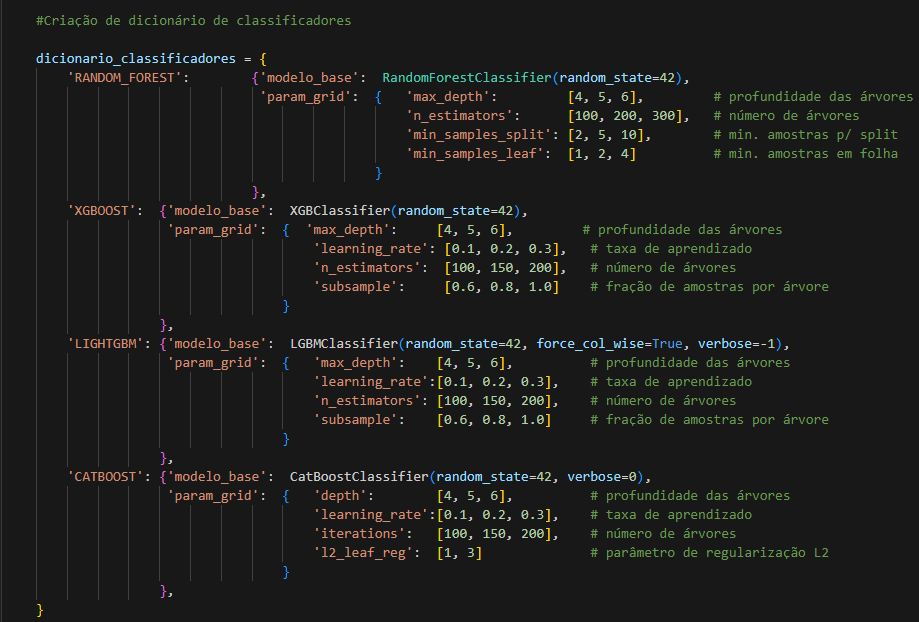

Após as simulações chegou-se que os melhores modelos, com base nos hiperparâmetros selecionados, foram os mostrados na figura abaixo:

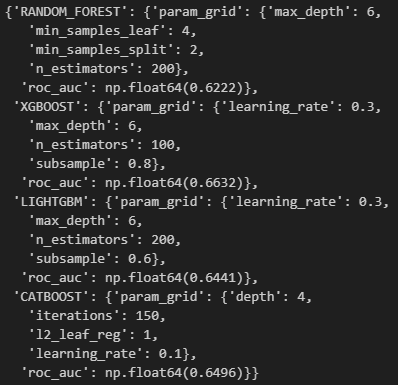


Em seguida, utiliozu-se as estratégias de Voting e Stacking para combinar modelos. Utilizou-se nessas estratégias os modelos individuais com os melhores parâmetros dados pelo GridSearch. Os resultados obtidos foram:

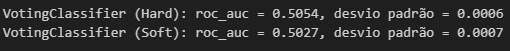

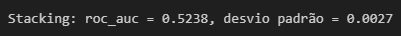

A partir do melhor modelo acima, pegar o arquivo CSV criado submeter ao Kaggle. Mostrar imagem com o print.

RESULTADOS DA PRATICA 05

Colar resultado final aqui (exemplo do que irá ser colado)

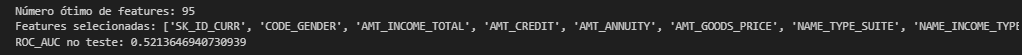

Pegar o arquivo CSV criado apos o RFE e submeter ao Kaggle. Mostrar imagem com o print.